# DATA AND PACKAGE IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# LOADING THE DATASET

In [2]:
TempData = pd.read_csv("C:/Users/user/Downloads/HCLTECH.csv")
TempData

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,2021-04-26,HCLTECH,EQ,955.65,940.0,954.50,923.05,930.00,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
5296,2021-04-27,HCLTECH,EQ,928.80,931.0,938.55,923.40,930.30,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
5297,2021-04-28,HCLTECH,EQ,928.85,931.2,935.85,921.75,925.90,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683
5298,2021-04-29,HCLTECH,EQ,923.80,929.7,929.70,907.10,910.30,909.55,914.34,8588734,7.852988e+14,363122.0,4041614.0,0.4706


# DATA CLEANING

In [33]:
StockData = TempData.dropna()

StockData.index = pd.to_datetime(StockData.Date)

StockData = StockData['Prev Close']['2013-01-01':'2013-12-2']
StockData.describe()


count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

# DATA EXPLORATION

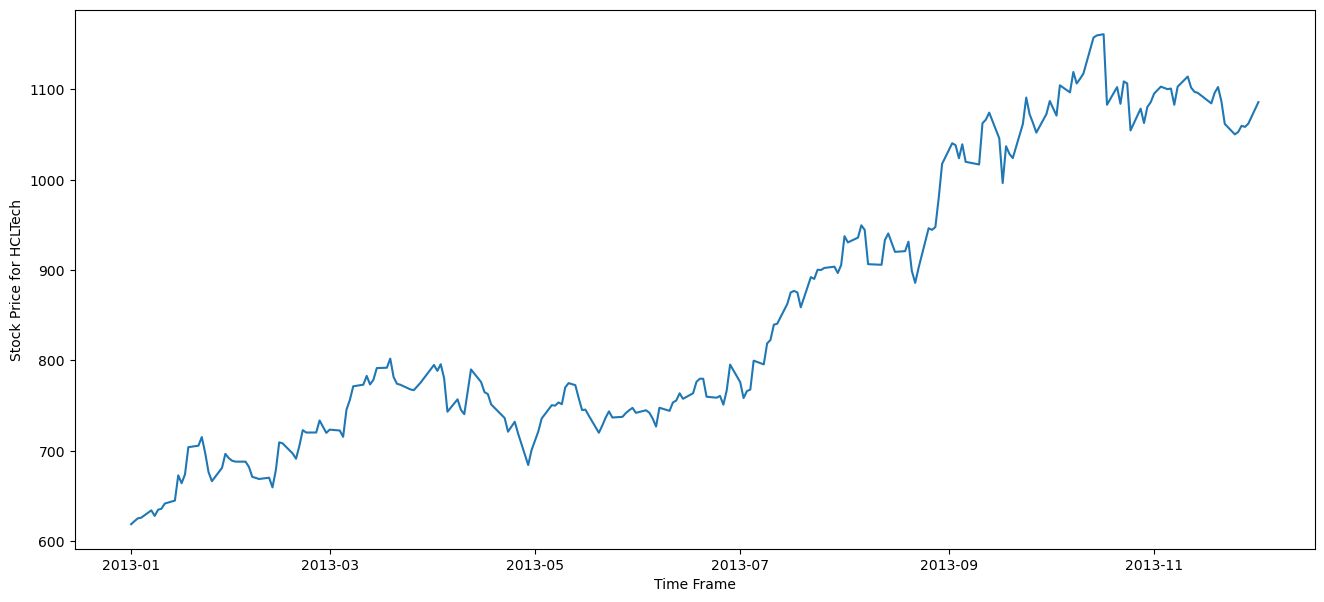

In [4]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTech')
ax1.plot(StockData)

# CHECKING STATIONARITY OF DATASET

Method 1 - Rolling Statistics

Method 2 - Duckey Fuller Test

Determining Rolling Statistics

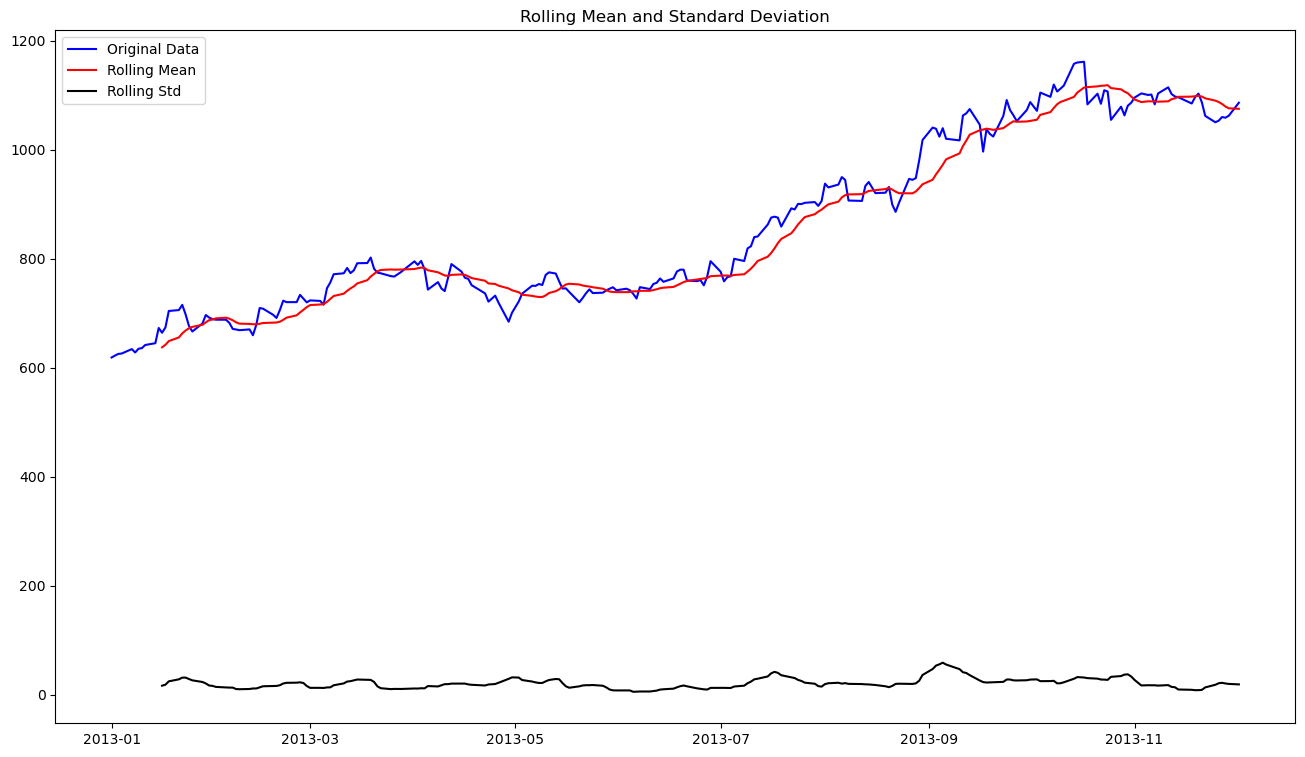

In [5]:
rollmean = StockData.rolling(12).mean()
rollstd = StockData.rolling(12).std()
plt.figure(figsize = (16,9))
fig = plt.figure(1)

#Plotiing the Rolling Statistics

orig = plt.plot(StockData,color='blue',label='Original Data')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

Rolling Stats plot shows that the Standard Deviation is constant over the time but the mean is fluctuating, i.e., not constant over time. Thus we need to make the Time Series Stationary.

# MAKING TIME SERIES STATIONARY

(230,)

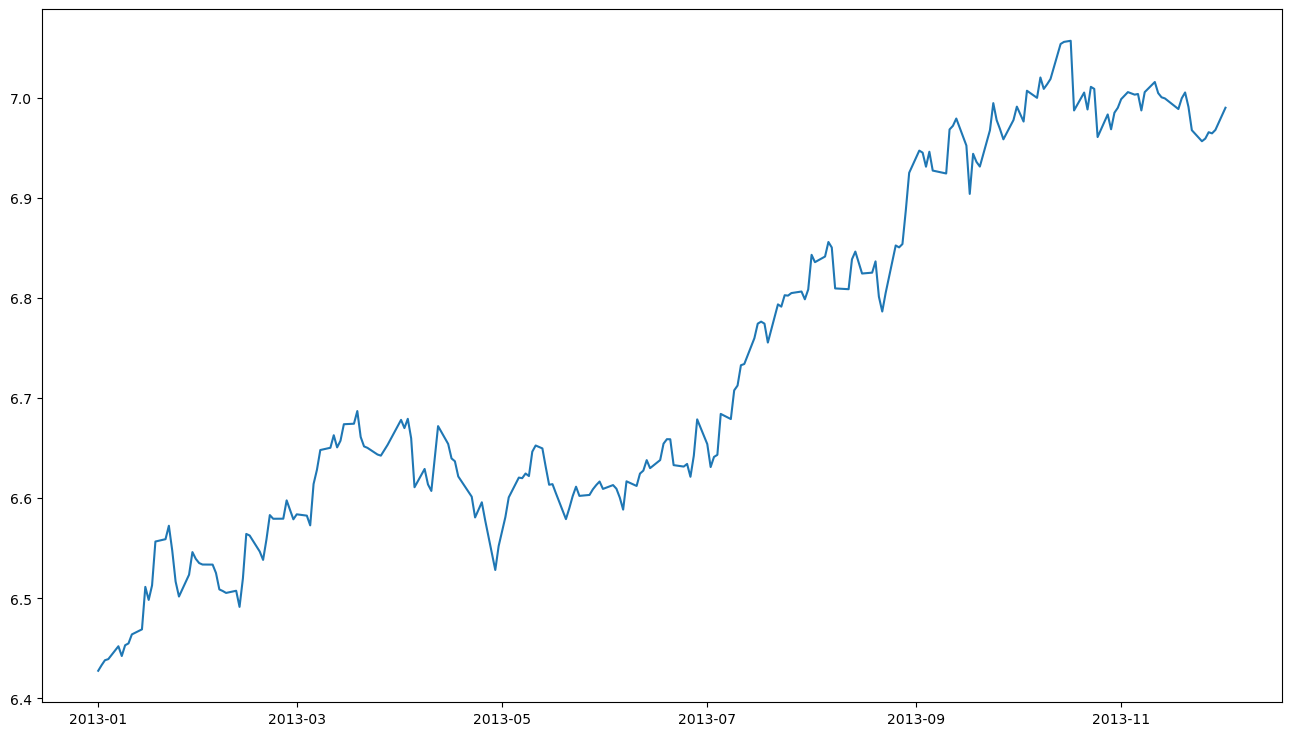

In [66]:
# lets Try Transformation

plt.figure(figsize = (16,9))
fig = plt.figure(1)
ts_log = np.log(StockData)
plt.plot(ts_log)
ts_log.shape

Deleting the rows having missing values

In [67]:
import pandas as pd
ts_log = np.log(StockData)
print(ts_log.shape)

missing_count = ts_log.isnull().sum()
print("Count of missing values in the column:", missing_count)


(230,)
Count of missing values in the column: 0


In [68]:
import pandas as pd

import pandas as pd
ts_log = np.log(StockData)

# Drop rows with missing values (NaN) from the DataFrame
ts_log.dropna(inplace=True)


print("Count of missing values in the column:", missing_count)
print(ts_log.shape)

Count of missing values in the column: 0
(230,)


Here, we are taking log transformation

Here. log transformation does not make the Time Series Stationary. To double sure about the Time Series not being Stationary, we will just decompose into seasonal components.

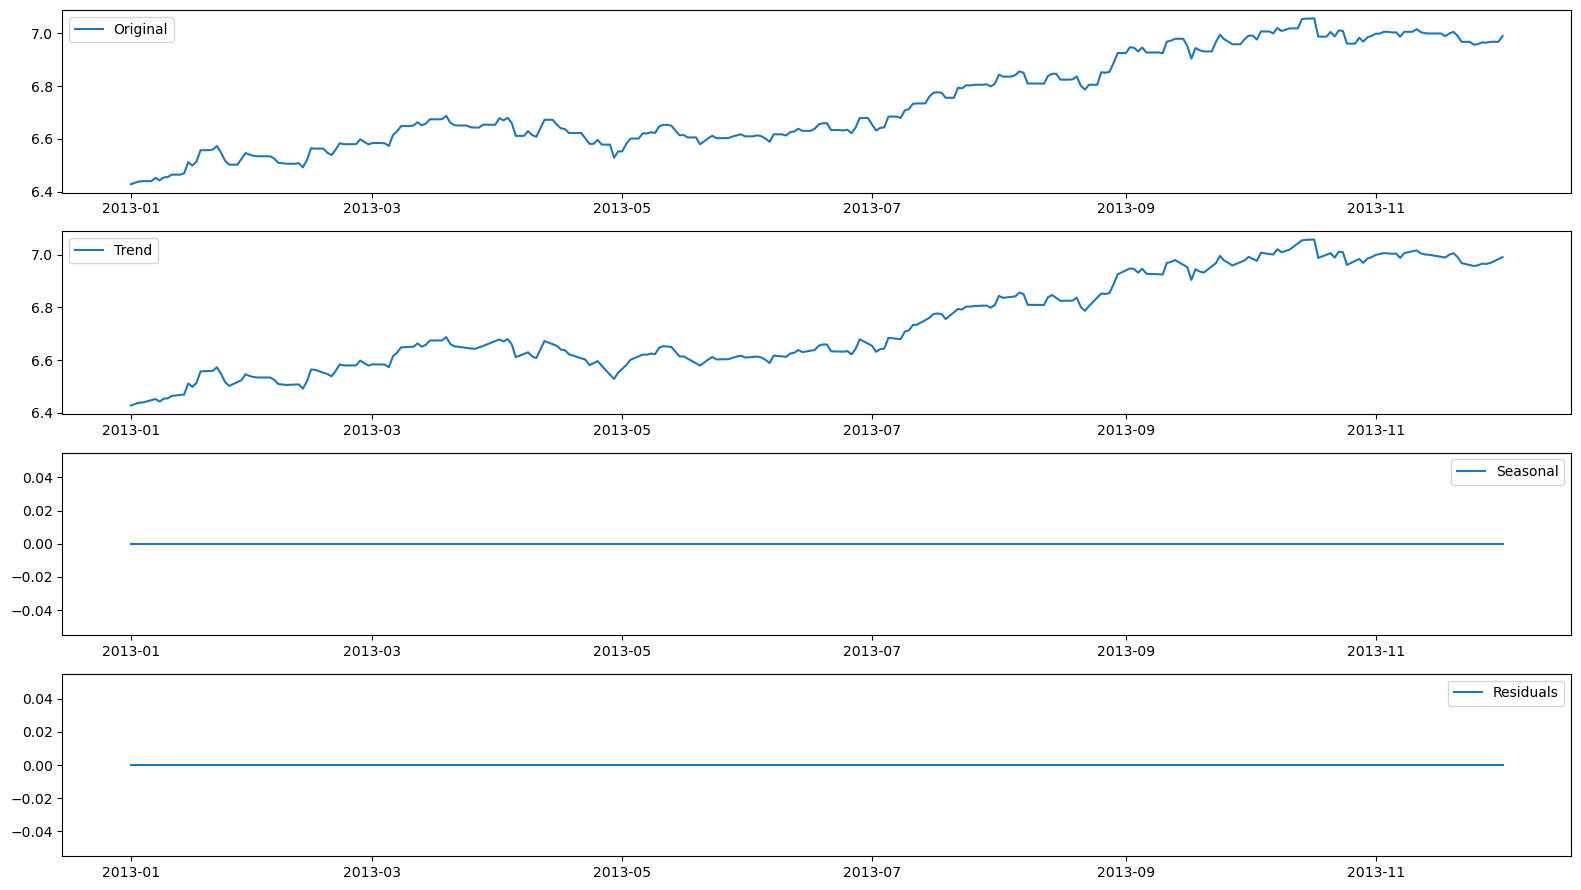

(230,)

In [69]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Perform seasonal decomposition on the original data without changing the frequency
decomposition = seasonal_decompose(ts_log, period=1, model='additive')

# Retrieve the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plotting
plt.figure(figsize=(16, 9))

plt.subplot(411)
plt.plot(ts_log_filled, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

ts_log.shape


From the plots, it is clear that the Trend and Seasonal both components all contribute to the irregularity in Time Series.   

So log transformation did no good.

Thus differencing is done further, i.e., a Differenced Time Series is created. In a Differenced Time Series we shift the Time Series by 1 and substract from the original value. 

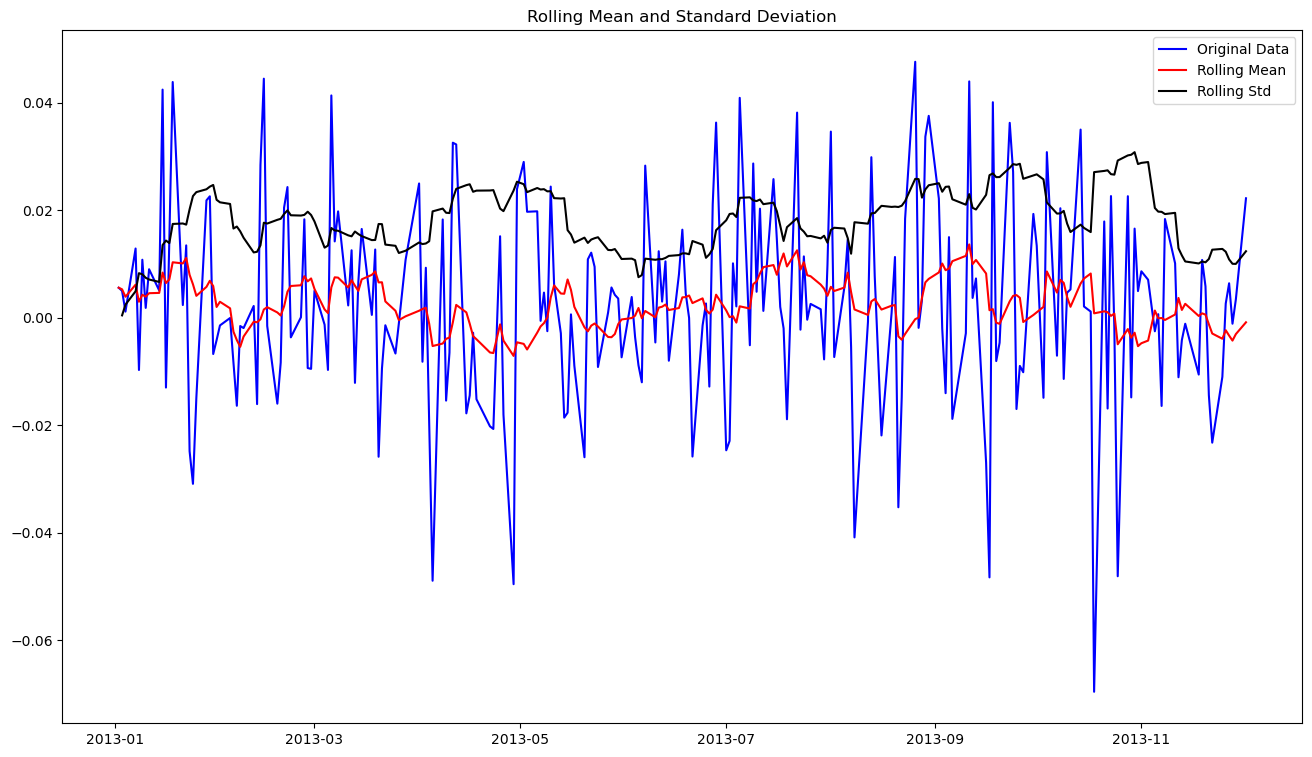

(230,)
(229,)


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Perform differencing
#ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log.diff(periods=1).dropna()
# Exclude the first row containing NaN
#ts_log_diff = ts_log_diff[1:]

# Determine Rolling Statistics
rollmean = ts_log_diff.rolling(12, min_periods=1).mean(skipna=True)
rollstd = ts_log_diff.rolling(12, min_periods=1).std(skipna=True)

# Plot Rolling Statistics
plt.figure(figsize=(16, 9))
orig = plt.plot(ts_log_diff, color='blue', label='Original Data')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()
print(ts_log.shape)
print(ts_log_diff.shape)

Thus, we have obtained stationarity, as there is no upward pattern in the mean or there is no upward pattern in standard deviation. So by the definition of Stationarity, if we take mean between any two specified time intervals from the plot, there should not be much difference in the mean of means or SDs.

We will Cross Validate the Stationarity of Time Series by doing a Duckey Fuller Test.

In [72]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming `ts_log` is a pandas Series or DataFrame with a datetime index

# Handle missing and infinite values
ts_log_cleaned = ts_log_diff.dropna()  # Remove missing values
ts_log_cleaned = ts_log_cleaned[np.isfinite(ts_log_cleaned)]  # Remove infinite values

# Perform Dickey-Fuller test
result = adfuller(ts_log_cleaned)

# Extract test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print test results
print('Test Statistic:', test_statistic)
print('p-value:', p_value)

# Interpret test results
if p_value < 0.05:
    print('The Time Series is Stationary.')
else:
    print('The Time Series is Non-Stationary')



Test Statistic: -11.814335558344519
p-value: 8.70994137094202e-22
The Time Series is Stationary.


# Now, Lets try ACF and PACF

ACF and PACF are important to determine what would be the order of AR and MA components in ARIMA model.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


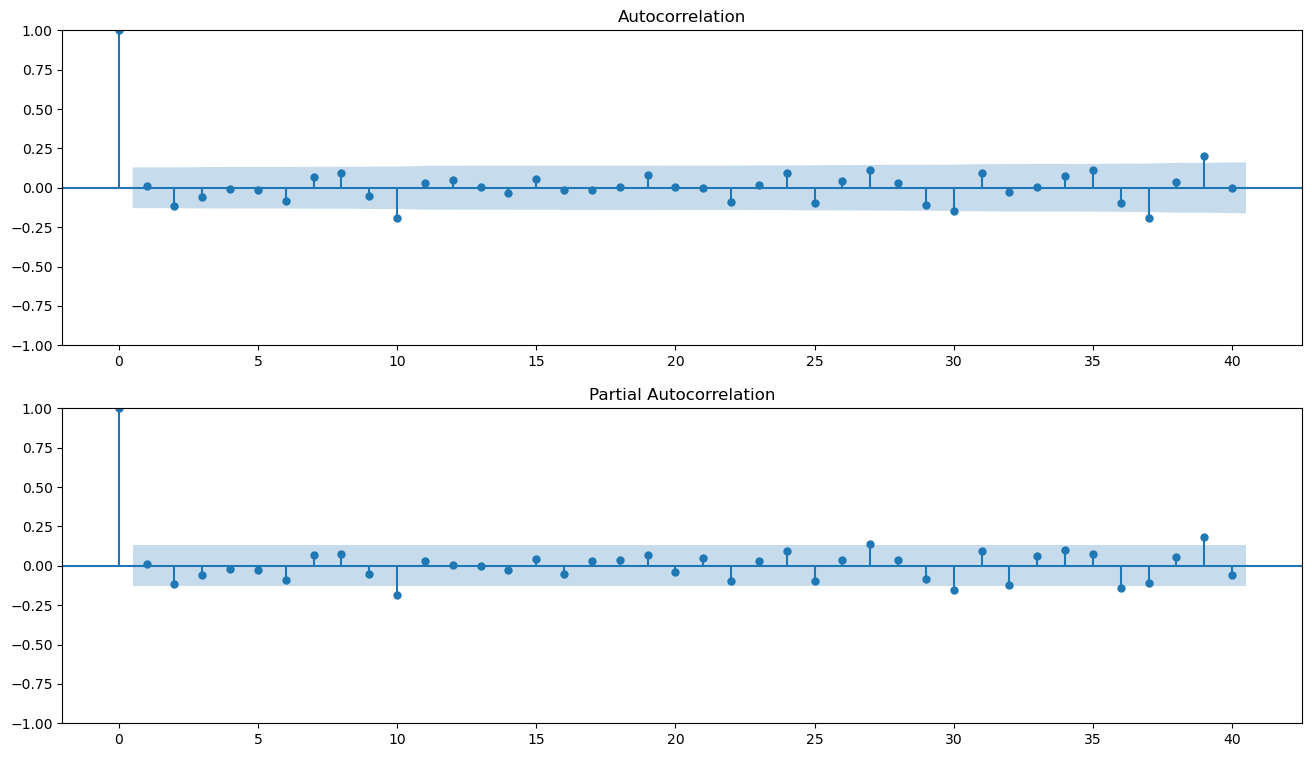

In [73]:
StockData.sort_index(inplace = True)

from statsmodels.tsa.stattools import acf,pacf
log_acf = acf(ts_log_diff,nlags = 20)
log_pacf = pacf(ts_log_diff,nlags = 20)

import statsmodels.api as sm
fig = plt.figure(figsize = (16,9))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags = 40,ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags = 40,ax = ax2)

Whenever we are running an ARIMA model, we do not know what order of AR, MA and I (p,d,q values) will be good for our model.
Thus in this scenario, ACF and PACF charts help us to understand the above stated problem.

# Rule for Noting the values of p,d,q From the ACF and PACF charts

The thumb rule is, whatever the highlighted part we see in the ACF and PACF charts are the Confidence Intervals and the first line that crosses the highlighted portion of the chart is the line of order. 

Thus, we consider order of AR as 2 since point 2 touches the highlighted portion first from the autocorrelation chart.

Similarly, order of MA is also considered as 2 from the partial autocorrelation chart, based on similar procedures.

We start with order (2,0,2) but we surely do not know whether this will be actually good for prediction or not.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


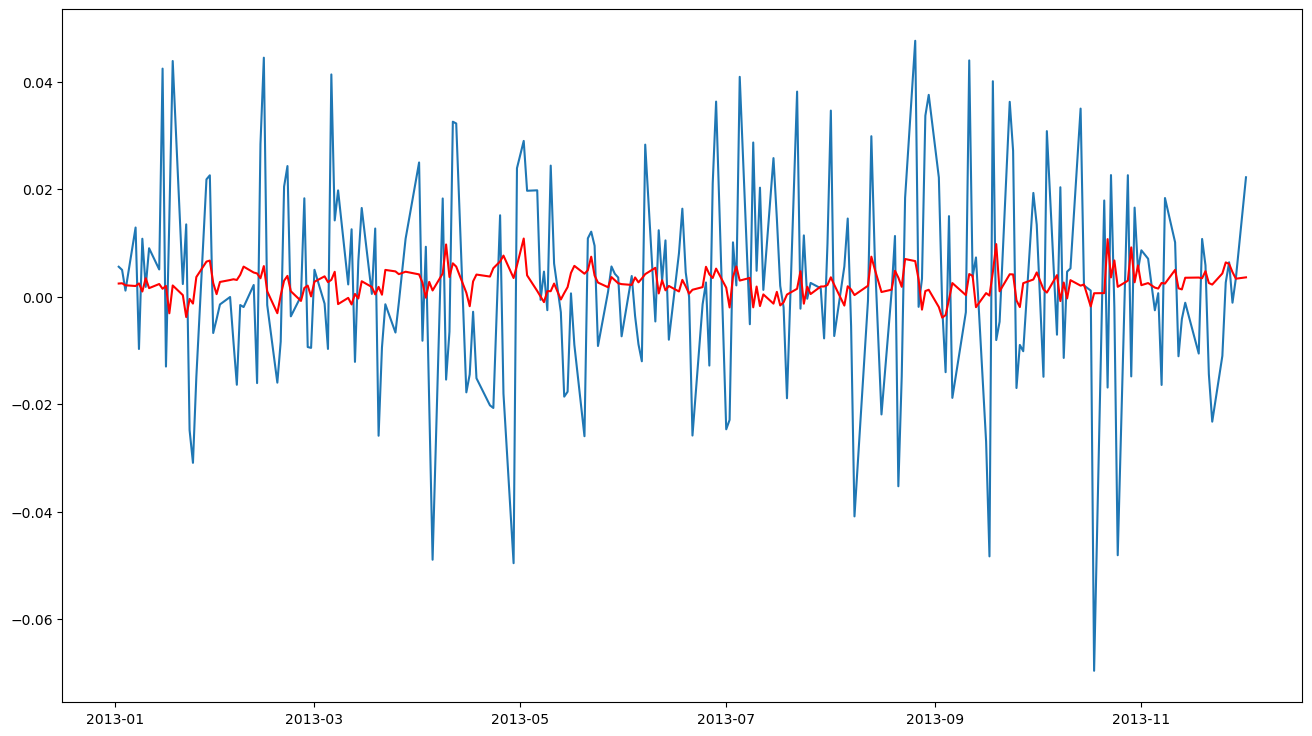

In [108]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16, 9))

model = ARIMA(ts_log_diff, order=(2, 0, 2))
results_ARIMA = model.fit()

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

Thus, we get a fitted curve which is stationary over the period. 

Now we have done many transformtaions, so, we need to take results back to the original scale.

In [109]:
# Taking results back to the original scale

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_diff_predictions.head)

<bound method NDFrame.head of Date
2013-01-02    0.002435
2013-01-03    0.002482
2013-01-04    0.002108
2013-01-07    0.001973
2013-01-08    0.002456
                ...   
2013-11-26    0.006365
2013-11-27    0.006089
2013-11-28    0.004563
2013-11-29    0.003335
2013-12-02    0.003585
Length: 229, dtype: float64>


Here we are printing the fitted values

In [110]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head)

<bound method NDFrame.head of Date
2013-01-02    0.002435
2013-01-03    0.004917
2013-01-04    0.007024
2013-01-07    0.008998
2013-01-08    0.011453
                ...   
2013-11-26    0.542712
2013-11-27    0.548801
2013-11-28    0.553364
2013-11-29    0.556699
2013-12-02    0.560285
Length: 229, dtype: float64>


Here, we are taking the cumulative sum, the reason being we differenced the Time Series.

In [111]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value = 0)
ARIMA_log_prediction.head

<bound method NDFrame.head of Date
2013-01-01    6.427621
2013-01-02    6.430055
2013-01-03    6.432537
2013-01-04    6.434645
2013-01-07    6.436618
                ...   
2013-11-26    6.970333
2013-11-27    6.976422
2013-11-28    6.980985
2013-11-29    6.984320
2013-12-02    6.987905
Length: 230, dtype: float64>

The addition done here is to compensate for the differencing we have done earlier. 

Date
2013-01-01     618.700000
2013-01-02     620.208291
2013-01-03     621.749355
2013-01-04     623.061252
2013-01-07     624.291908
                 ...     
2013-11-26    1064.576865
2013-11-27    1071.079112
2013-11-28    1075.977565
2013-11-29    1079.571900
2013-12-02    1083.449344
Length: 230, dtype: float64


(230,)

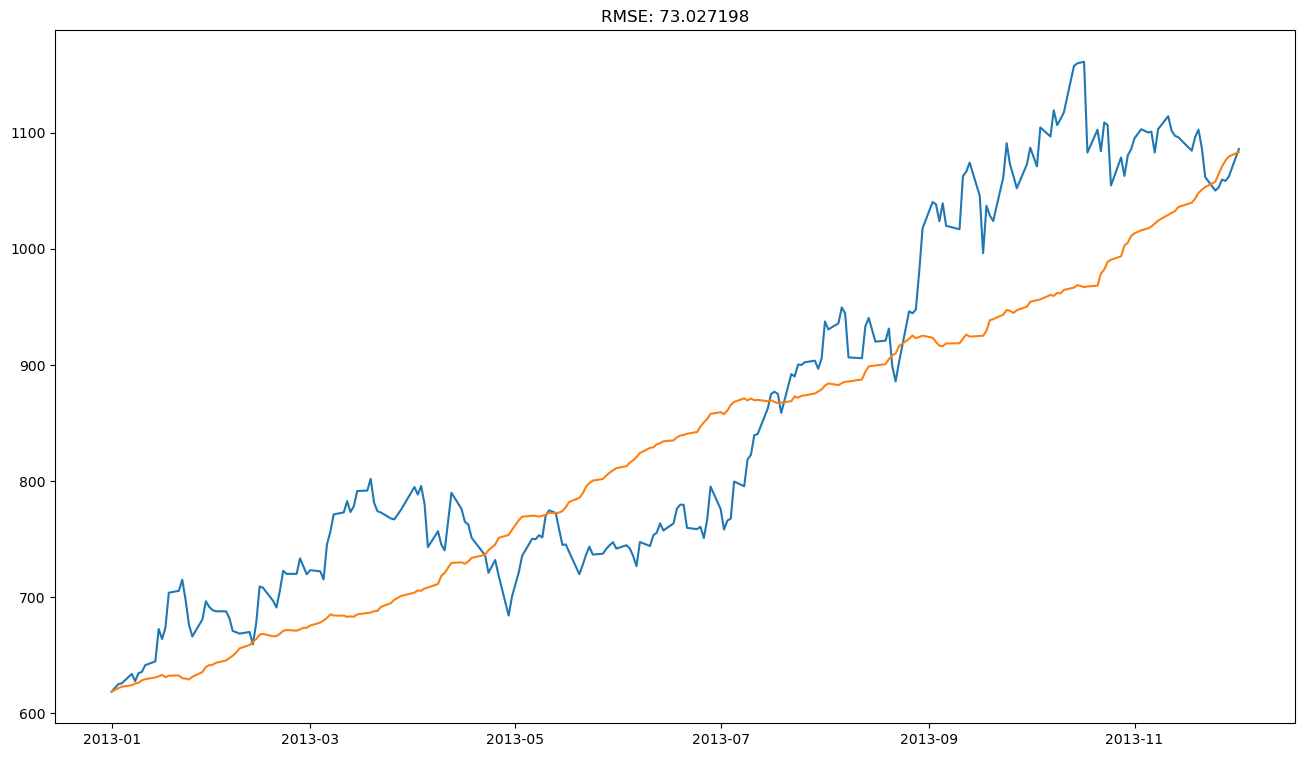

In [112]:
plt.figure(figsize = (16,9))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
print(predictions_ARIMA)
pred=np.exp(ARIMA_log_prediction)
plt.plot(StockData)
plt.plot(pred)
plt.title('RMSE: %4f' % np.sqrt(abs(sum((pred - StockData)**2))/len(StockData)))
StockData.shape

Since, we have done log transformation, thus, to scale the values back to original, we exponentiate the log values.

The predicted Time Series is capturing the trend component well but fails to capture some of the unexpected fluctuations of the data, as the volume of fluctuations does not match. So, we are getting an RMSE value.

In [113]:
results_ARIMA.predict(0,30)

Date
2013-01-02    0.002435
2013-01-03    0.002482
2013-01-04    0.002108
2013-01-07    0.001973
2013-01-08    0.002456
2013-01-09    0.000953
2013-01-10    0.003423
2013-01-11    0.001577
2013-01-14    0.002344
2013-01-15    0.001458
2013-01-16    0.001990
2013-01-17   -0.003102
2013-01-18    0.002076
2013-01-21    0.000278
2013-01-22   -0.003800
2013-01-23   -0.000428
2013-01-24   -0.001295
2013-01-25    0.003642
2013-01-28    0.006516
2013-01-29    0.006710
2013-01-30    0.002534
2013-01-31    0.000459
2013-02-01    0.002727
2013-02-04    0.003088
2013-02-05    0.003229
2013-02-06    0.003100
2013-02-07    0.004060
2013-02-08    0.005585
2013-02-11    0.004483
2013-02-12    0.004314
2013-02-13    0.003417
Name: predicted_mean, dtype: float64

Some Predicted results...

In [114]:
from sklearn.metrics import r2_score
r2_score(StockData,pred)

0.7812645690708582

We might improve the accuracy by defining improved parameter values of p,d and q.

There is another way in which we can improve our results. The way is known as Auto-ARIMA.

# AUTO ARIMA

In [92]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 572.7/572.7 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [99]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,start_p = 3,
                            start_q = 3,
                            max_p = 10,
                            max_q = 10,
                            test = 'adf',
                            seasonal = True,
                            trace = True)
    return automodel

In [100]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1158.020, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.643 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

Thus we have got our best p,d and q values, which are p = 0, d = 1, q = 0. Now we are going to put these values in the ARIMA model and recalculate the predictions.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


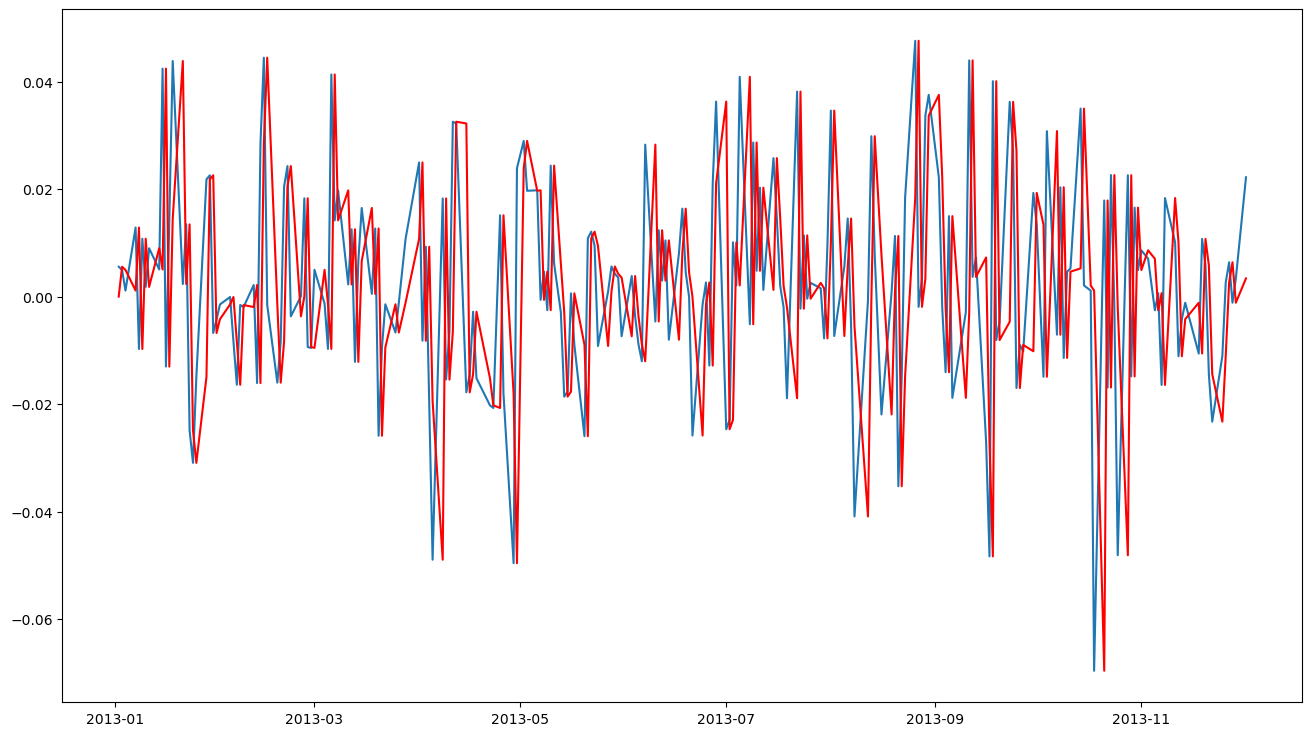

In [123]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16, 9))

model = ARIMA(ts_log_diff, order=(0, 1, 0)) #New values substituted
results_ARIMA = model.fit()

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

The curve we have got is surely overfitting. Let's see further reults...

In [116]:
# Taking results back to the original scale

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_diff_predictions.head)

<bound method NDFrame.head of Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.004970
2013-01-07    0.001119
2013-01-08    0.012857
                ...   
2013-11-26   -0.011032
2013-11-27    0.002615
2013-11-28    0.006390
2013-11-29   -0.001133
2013-12-02    0.003395
Length: 229, dtype: float64>


Same calculations repeated...

In [117]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head)

<bound method NDFrame.head of Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010531
2013-01-07    0.011650
2013-01-08    0.024507
                ...   
2013-11-26    0.529163
2013-11-27    0.531778
2013-11-28    0.538168
2013-11-29    0.537035
2013-12-02    0.540430
Length: 229, dtype: float64>


In [118]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value = 0)
ARIMA_log_prediction.head

<bound method NDFrame.head of Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438152
2013-01-07    6.439270
                ...   
2013-11-26    6.956784
2013-11-27    6.959399
2013-11-28    6.965788
2013-11-29    6.964655
2013-12-02    6.968050
Length: 230, dtype: float64>

Date
2013-01-01     618.700000
2013-01-02     618.700000
2013-01-03     622.150000
2013-01-04     625.250000
2013-01-07     625.950000
                 ...     
2013-11-26    1050.250001
2013-11-27    1053.000001
2013-11-28    1059.750001
2013-11-29    1058.550001
2013-12-02    1062.150001
Length: 230, dtype: float64


(230,)

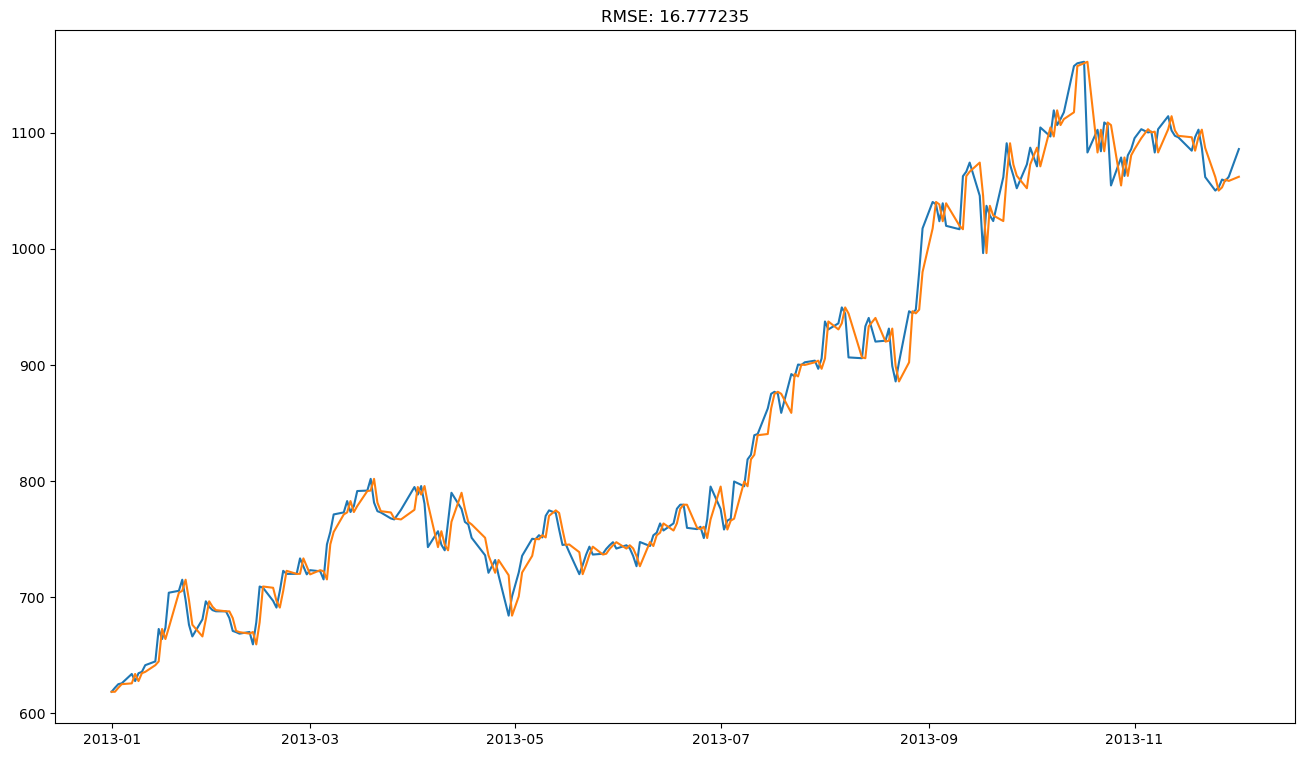

In [119]:
plt.figure(figsize = (16,9))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
print(predictions_ARIMA)
pred=np.exp(ARIMA_log_prediction)
plt.plot(StockData)
plt.plot(pred)
plt.title('RMSE: %4f' % np.sqrt(abs(sum((pred - StockData)**2))/len(StockData)))
StockData.shape

Thus, our Time Series model is perfetctly capturing the trend as well as the unexpected fluctuations also.

Hence, Auto-ARIMA has helped us to find the best model.

In [120]:
results_ARIMA.predict(0,30)

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.004970
2013-01-07    0.001119
2013-01-08    0.012857
2013-01-09   -0.009747
2013-01-10    0.010772
2013-01-11    0.001810
2013-01-14    0.009002
2013-01-15    0.005053
2013-01-16    0.042430
2013-01-17   -0.013015
2013-01-18    0.014501
2013-01-21    0.043845
2013-01-22    0.002341
2013-01-23    0.013443
2013-01-24   -0.024845
2013-01-25   -0.030933
2013-01-28   -0.014970
2013-01-29    0.021821
2013-01-30    0.022576
2013-01-31   -0.006770
2013-02-01   -0.004200
2013-02-04   -0.001452
2013-02-05   -0.000073
2013-02-06   -0.008393
2013-02-07   -0.016405
2013-02-08   -0.001566
2013-02-11   -0.001942
2013-02-12    0.002166
2013-02-13   -0.016094
Name: predicted_mean, dtype: float64

In [121]:
from sklearn.metrics import r2_score
r2_score(StockData,pred)

0.9884550881244419

Our Time Series Model explains nearly 98.8% variation in the data.